In [1]:
# Generic Libraries being imported
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Data Set Imported
from sklearn.datasets import fetch_california_housing

In [2]:
data=fetch_california_housing()

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
# Independent Data
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
data.data.shape

(20640, 8)

In [6]:
# Dependent Variable
df['Target']=data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Exploring Data

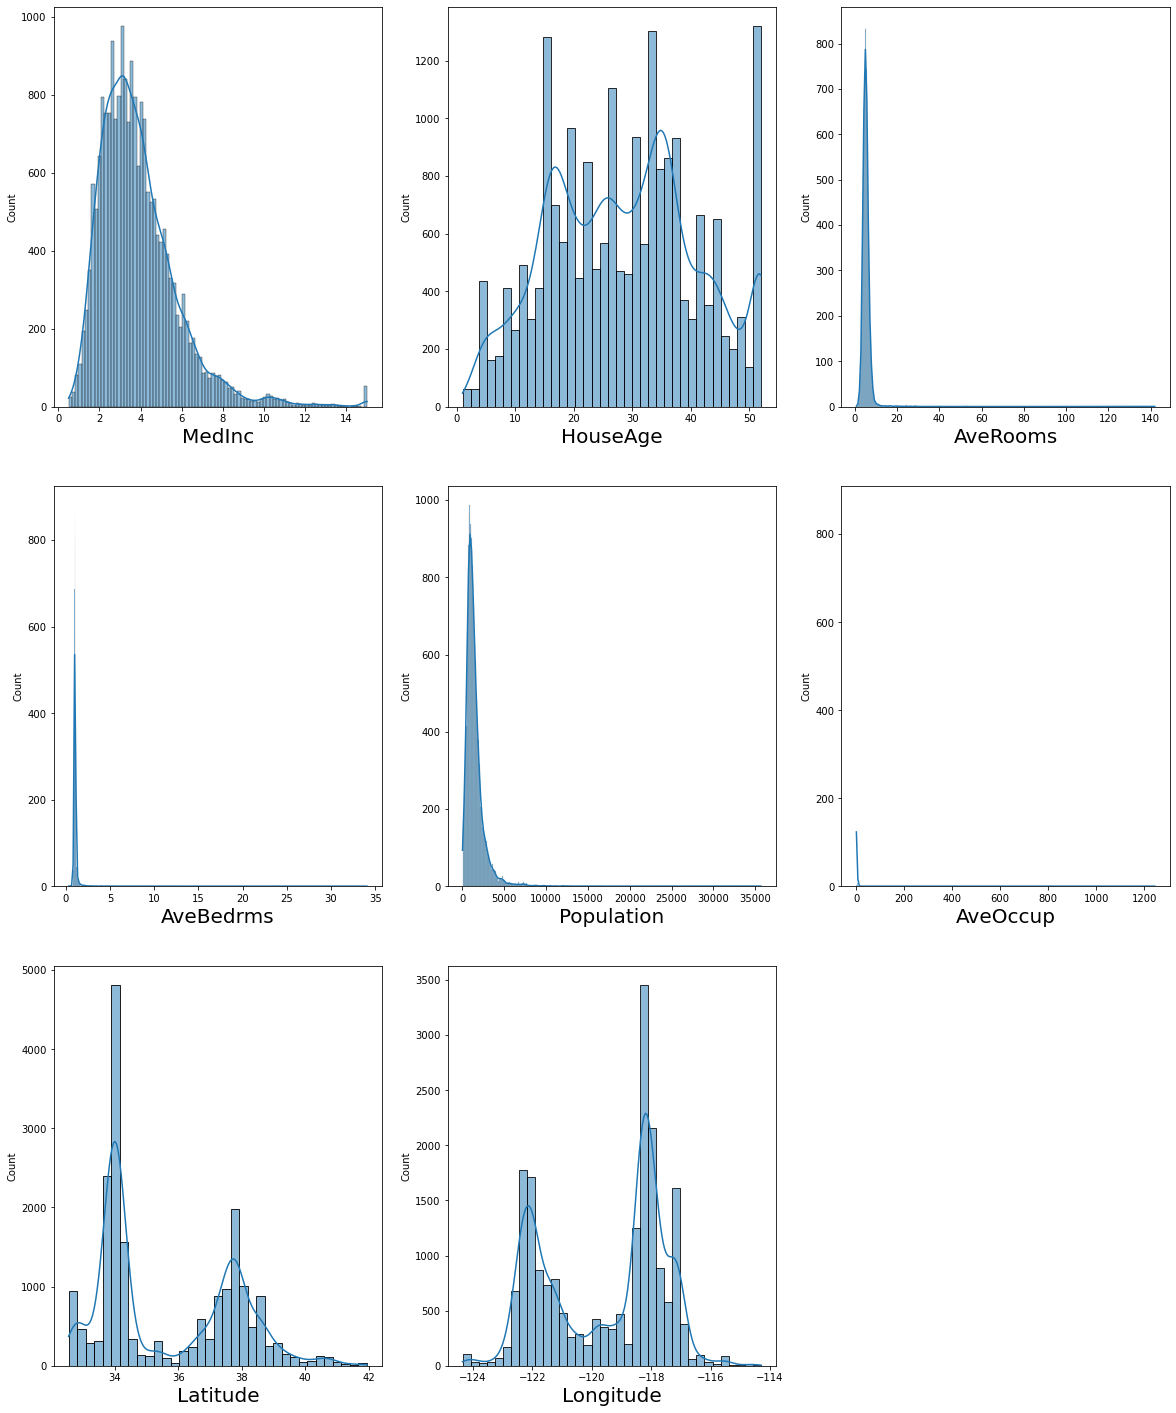

In [7]:
import seaborn as sns
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

# Data Pre-Processing

In [10]:
#Feature Engineering
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent='geoapiExercises')

In [11]:
geolocator.reverse("37.88"+" , "+"-122.23").raw['address']

{'leisure': 'Ecological Study Area',
 'road': 'Willow Trail',
 'city': 'Oakland',
 'county': 'Alameda County',
 'state': 'California',
 'postcode': '94720-1076',
 'country': 'United States',
 'country_code': 'us'}

In [12]:
def location(cord):
    Latitude=str(cord[0])
    Longitude=str(cord[1])
    
    #returns a dictionary
    location=geolocator.reverse(Latitude +" , "+Longitude).raw['address']
    
    if location.get('road') is None:
        location['road']=None
    
    if location.get('county') is None:
        location['county']=None
    loc_update['county'].append(location['county'])
    loc_update['road'].append(location['road'])

In [13]:
# import pickle
# loc_update={"county":[],"road":[]}

# for i, cord in enumerate(df.iloc[:,6:-1].values):
#     location(cord)
#     pickle.dump(loc_update, open('loc_update.pickle','wb'))
#     if i%100==0:
#       print(i)

In [14]:
import pickle
loc_update=pickle.load(open("./loc_update.pickle","rb"))
loc=pd.DataFrame(loc_update)
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  15262 non-null  object
 1   road    19498 non-null  object
dtypes: object(2)
memory usage: 322.6+ KB


In [15]:
# Adding new feature to data frame
for i in loc_update.keys():
    df[i]=loc_update[i]
df=df.sample(axis=0, frac=1)


In [16]:
#Dropping latitude adn longitude from data frame
df.drop(labels=["Latitude", "Longitude"],axis=1,inplace=True)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,county,road
2612,2.1726,23.0,4.287179,0.987179,1060.0,2.717949,0.755,Humboldt County,None
15189,4.3571,16.0,4.142857,0.952381,32.0,1.523810,1.446,San Diego County,Plaza Otonal
7714,5.0526,36.0,6.088496,1.015487,1211.0,2.679204,2.698,None,Otto Street
10722,4.1944,8.0,2.909091,0.818182,26.0,2.363636,2.708,Orange County,Copper Creek
18911,3.7240,15.0,5.151276,1.068651,5008.0,3.042527,1.316,Solano County,CA 37


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 2612 to 4081
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Target      20640 non-null  float64
 7   county      15262 non-null  object 
 8   road        19498 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


## Using Classification Algorithm to fill the missing data

In [18]:
# applying logistic regression to find the missing values
missing_idx=[]
for i in range(df.shape[0]):
    if df['road'][i] is None:
        missing_idx.append(i)
# Independent Parameters
missing_road_x_train=np.array([ [df['MedInc'][i], df['AveRooms'][i], df['AveBedrms'][i]] for i in range(df.shape[0]) if i not in missing_idx])
# Dependent Parameters
missing_road_y_train=np.array([ df['road'][i] for i in range(df.shape[0]) if i not in missing_idx])
    
missing_road_x_test=np.array([ [df['MedInc'][i], df['AveRooms'][i], df['AveBedrms'][i]] for i in range(df.shape[0]) if i in missing_idx])

In [19]:
from sklearn.linear_model import SGDClassifier

#Initiating the model
model_1=SGDClassifier()

#Training Model
model_1.fit(missing_road_x_train,missing_road_y_train)

missing_road_y_pred=model_1.predict(missing_road_x_test)

In [20]:
np.unique(missing_road_y_pred)

array(['20th Street', 'Cherokee Lane', 'East Andrews Avenue',
       'Knott Street', 'Laurelei Avenue', 'Maricopa Street',
       'Mount Tallac Trail (17E33B)', 'Rogue Street', 'West Main Street',
       'Whittier Boulevard'], dtype='<U77')

In [21]:
# add the modeled data back to the data frame
for n,i in enumerate(missing_idx):
  df['road'][i]=missing_road_y_pred[n]

<ipython-input-21-798ff5db107b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['road'][i]=missing_road_y_pred[n]


In [22]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['road']=le.fit_transform(df['road'])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,county,road
2612,2.1726,23.0,4.287179,0.987179,1060.0,2.717949,0.755,Humboldt County,48
15189,4.3571,16.0,4.142857,0.952381,32.0,1.523810,1.446,San Diego County,6177
7714,5.0526,36.0,6.088496,1.015487,1211.0,2.679204,2.698,None,5869
10722,4.1944,8.0,2.909091,0.818182,26.0,2.363636,2.708,Orange County,1789
18911,3.7240,15.0,5.151276,1.068651,5008.0,3.042527,1.316,Solano County,1164


In [23]:
# applying logistic regression to find the missing values
missing_idx=[]
for i in range(df.shape[0]):
    if df['county'][i] is None:
        missing_idx.append(i)
# Independent Parameters
missing_county_x_train=np.array([ [df['MedInc'][i], df['AveRooms'][i], df['AveBedrms'][i]] for i in range(df.shape[0]) if i not in missing_idx])
# Dependent Parameters
missing_county_y_train=np.array([ df['county'][i] for i in range(df.shape[0]) if i not in missing_idx])
    
missing_county_x_test=np.array([ [df['MedInc'][i], df['AveRooms'][i], df['AveBedrms'][i]] for i in range(df.shape[0]) if i in missing_idx])

In [24]:
missing_county_y_train

array(['Alameda County', 'Alameda County', 'Alameda County', ...,
       'Yuba County', 'Yuba County', 'Yuba County'], dtype='<U22')

In [25]:
#Training Model
model_2=SGDClassifier()

model_2.fit(missing_county_x_train,missing_county_y_train)

missing_county_y_pred=model_2.predict(missing_county_x_test)

In [26]:
np.unique(missing_county_y_pred)

array(['Mendocino County', 'Orange County', 'San Francisco',
       'San Mateo County', 'Siskiyou County'], dtype='<U22')

In [27]:
# add the modeled data back to the data frame
for n,i in enumerate(missing_idx):
    df['county'][i]=missing_county_y_pred[n]

df['county']=le.fit_transform(df['county'])

df.head()

<ipython-input-27-80a5952b5351>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['county'][i]=missing_county_y_pred[n]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,county,road
2612,2.1726,23.0,4.287179,0.987179,1060.0,2.717949,0.755,12,48
15189,4.3571,16.0,4.142857,0.952381,32.0,1.523810,1.446,39,6177
7714,5.0526,36.0,6.088496,1.015487,1211.0,2.679204,2.698,24,5869
10722,4.1944,8.0,2.909091,0.818182,26.0,2.363636,2.708,32,1789
18911,3.7240,15.0,5.151276,1.068651,5008.0,3.042527,1.316,50,1164


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 2612 to 4081
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Target      20640 non-null  float64
 7   county      20640 non-null  int32  
 8   road        20640 non-null  int32  
dtypes: float64(7), int32(2)
memory usage: 2.0 MB


## Understanding which model to use

In [29]:
# Dependent Values
y=df.iloc[:,6].values
df1=df
df.drop(labels=['Target'],axis=1,inplace=True)

In [30]:
#Independent Values
x=df.iloc[:,:].values

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
# Model Prediction

y_pred=model.predict(x_test)

In [34]:
#Model Accuracy

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)*100

75.91696855420209